<a href="https://colab.research.google.com/github/shweta0408/Datastructures/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/churn.csv')

## Data Preprocessing-1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
df.shape

(10000, 14)

Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [25]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [26]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Checking null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
#checking data types
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [11]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
#Renaming the column 'Exited' to 'Churn
df.rename(columns={'Exited': 'Churn'}, inplace=True)

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Explorative Data Analysis

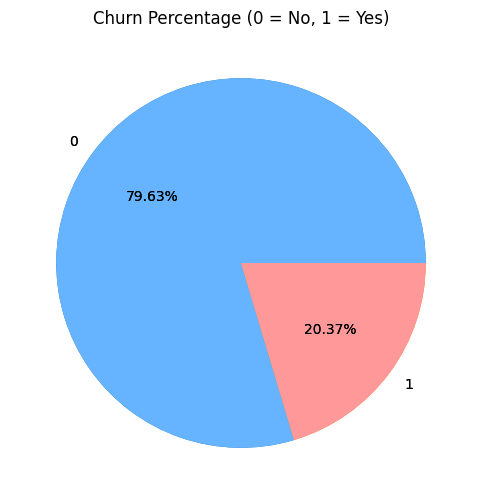

In [15]:
#Pie Chart for Customer Churn
labels = df['Churn'].value_counts().index
values = df['Churn'].value_counts().values

plt.figure(figsize=(10,6))
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title(
'Churn Percentage (0 = No, 1 = Yes)'
)
colors = ['#66b3ff','#ff9999']
plt.pie(values, labels=labels, autopct='%1.2f%%', colors=colors)


plt.show()





The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with only 20.4% of the customers churning.

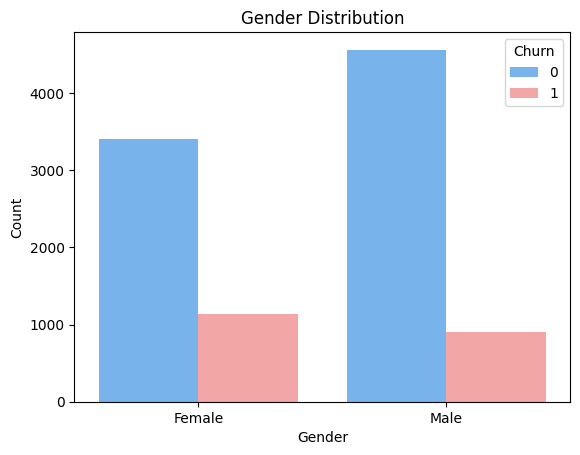

In [16]:
#gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn' ,palette=colors)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
colors = ['#66b3ff','#ff9999']
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. However there is not much difference between the churn count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer

####Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

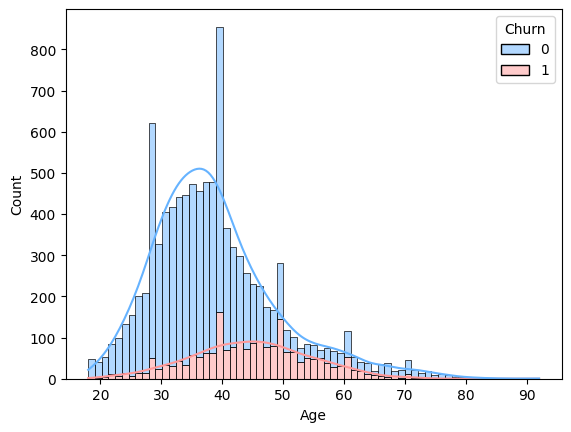

In [17]:
#histogram for age distribution
colors = ['#66b3ff', '#ff9999']
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True, palette=colors)

This histogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

## Credit Score

<Axes: xlabel='Churn', ylabel='CreditScore'>

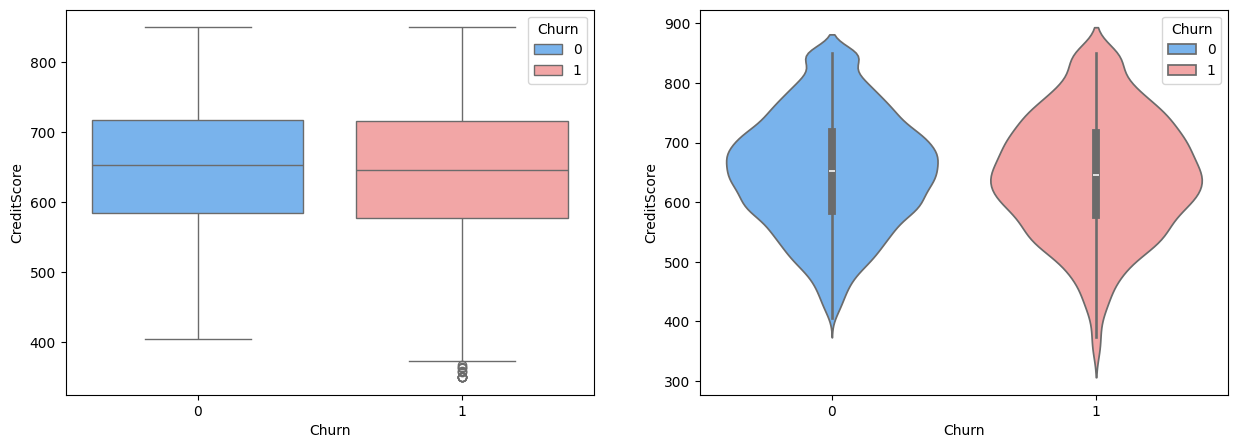

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
colors = ['#66b3ff', '#ff9999']
sns.boxplot(x="Churn", y="CreditScore", hue='Churn', data=df, ax=ax[0], palette=colors)
sns.violinplot(x="Churn", y="CreditScore",hue='Churn', data=df, ax=ax[1],palette=colors)

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

## Customer Location

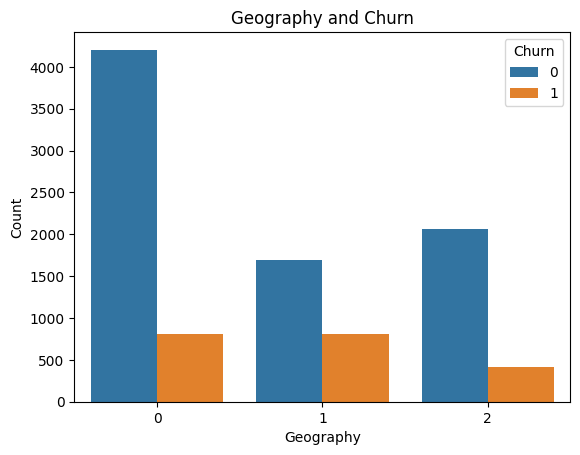

In [68]:
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

This graphs shows the number of customers from the their repective countries aling with their churn count. Majority of the customers are from France, followed by Spain and Germany. However in contrast to that Germany has the highest number of customer curn followed by France and Spain. From this we can infer that German customers are more likely to churn than the customers from other countries.

## Tenure

<Axes: xlabel='Tenure', ylabel='count'>

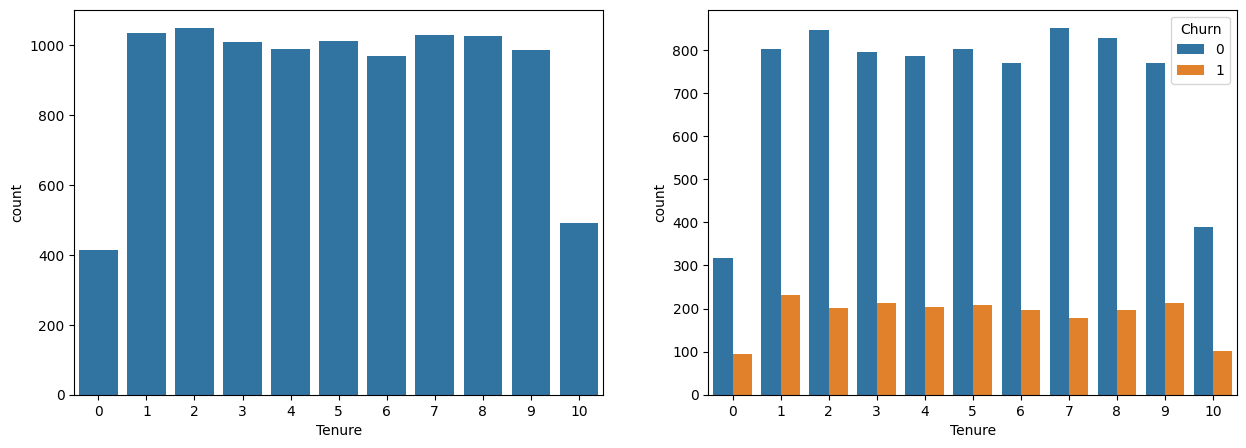

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

## Bank Balance

<Axes: xlabel='Balance', ylabel='Count'>

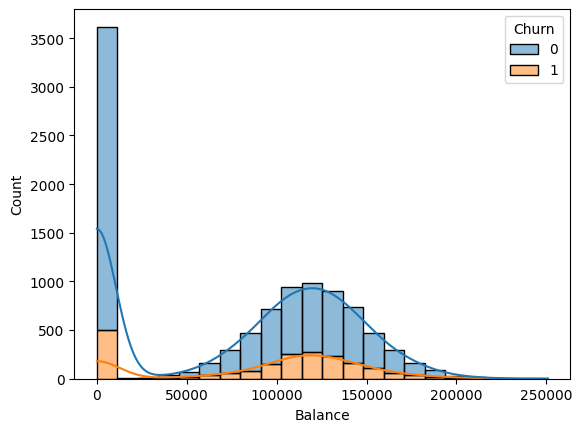

In [23]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

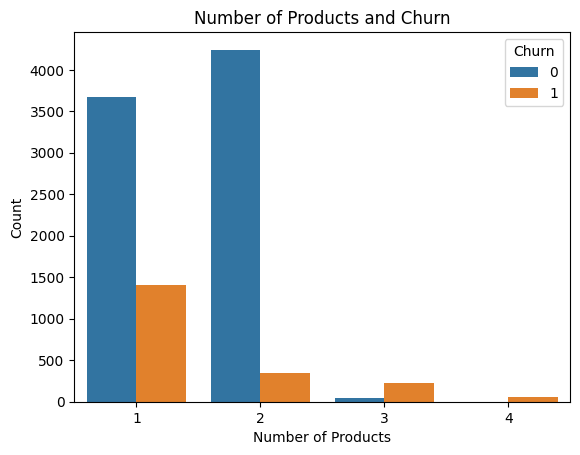

In [24]:
#Number of products purchased
sns.countplot(x='NumOfProducts', hue='Churn', data=df)
plt.title('Number of Products and Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

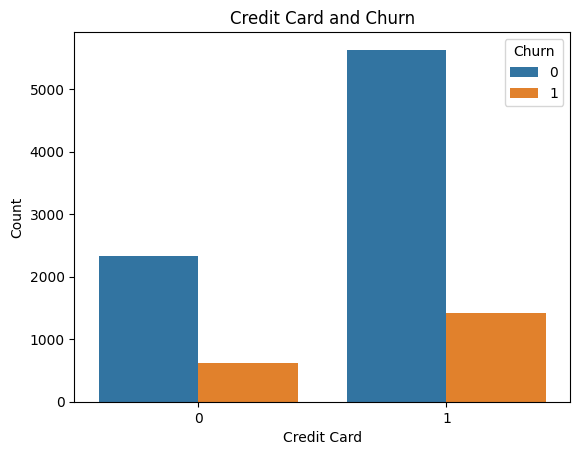

In [25]:
#Customers with/without credit card
sns.countplot(x='HasCrCard', hue='Churn', data=df)
plt.title('Credit Card and Churn')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

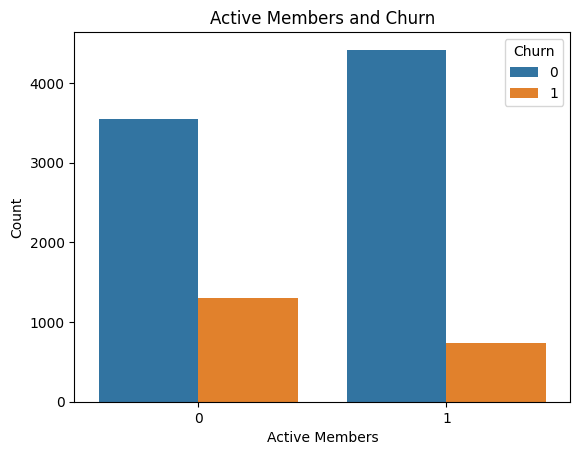

In [29]:
#Active Members
sns.countplot(x='IsActiveMember', hue='Churn', data=df)
plt.title('Active Members and Churn')
plt.xlabel('Active Members')
plt.ylabel('Count')
plt.show()

As expected, the churn count is higher for non active members as compared to the active members of the bank. This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank. Therefore, the bank should focus on the non active members and try to improve their services to retain them.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

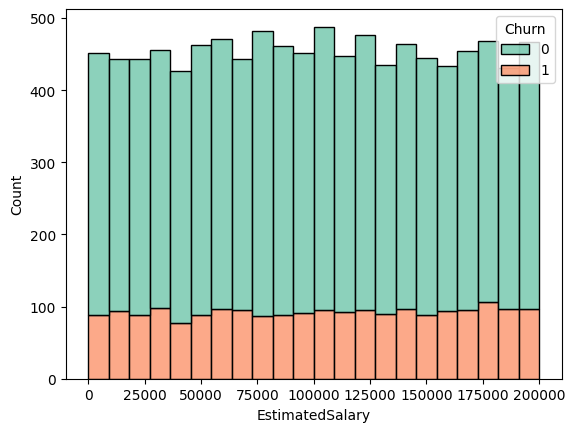

In [33]:
#Estimated Salary
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

# Data Preprocessing-2

In [34]:
#label encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for vars in variables:
    le.fit(df[vars].unique())
    df[vars]=le.transform(df[vars])
    print(vars,df[vars].unique())

Geography [0 2 1]
Gender [0 1]


In [35]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


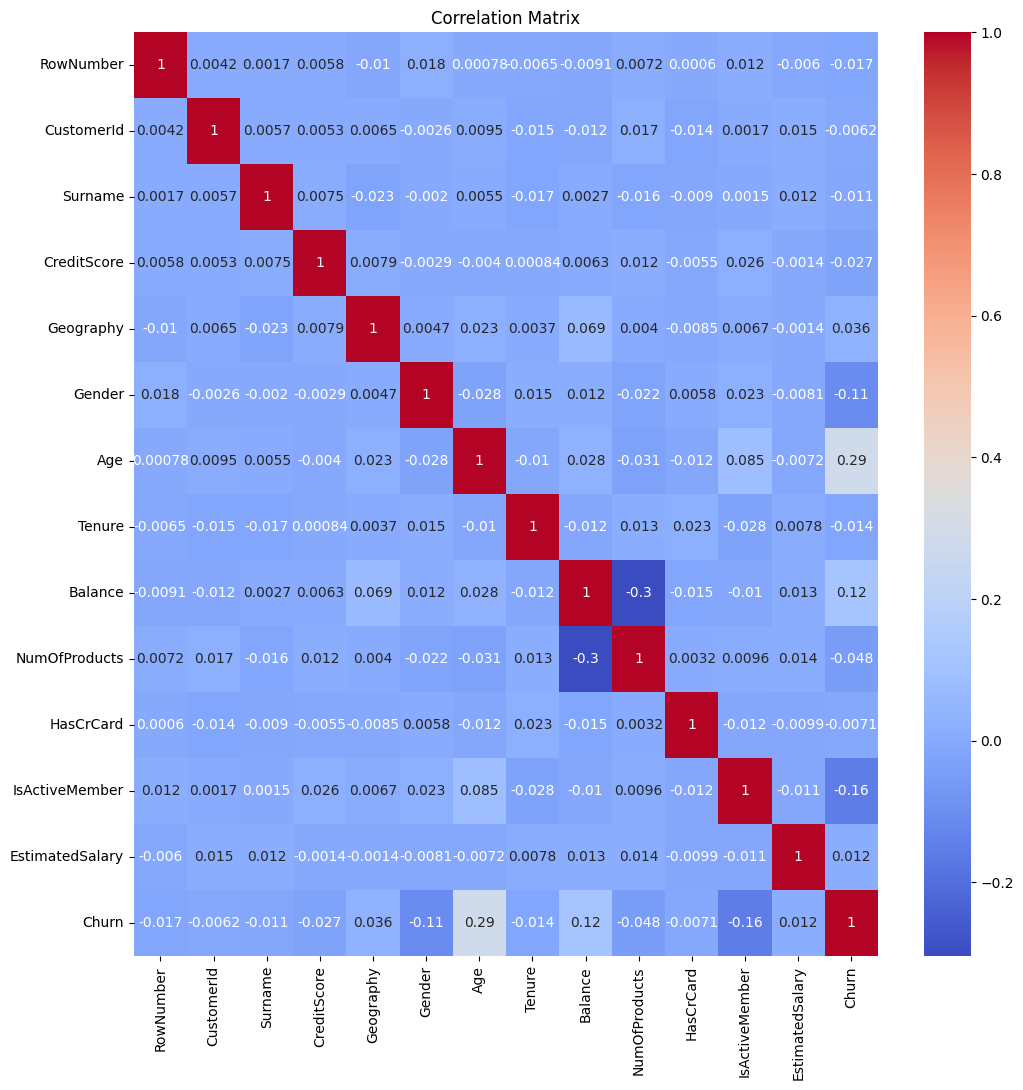

In [42]:
#Coorelation Matrix Heatmap
# Convert all object type columns to numeric using Label Encoding
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Now calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is no significant coorelation among the variables.

# Train Test Split

In [43]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

Churn Prediction
For predicting the churn of customers, depending on the data of the customers, we will use the following models:

  1. Decision Tree Classifier
  2. Random Forest Classifier

---





Decision Tree Classifier
Using GridSearchCV to find the best parameters for the model.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'random_state': 42}


In [45]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [46]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8584285714285714

In [47]:
dtree_pred = dtree.predict(X_test)

## Random Forest Classifier

In [50]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [51]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8754285714285714

In [52]:
rfc_pred = rfc.predict(X_test)

## Model Evalution
## Decision Tree Classifier
## Confusion Matrix Heatmap

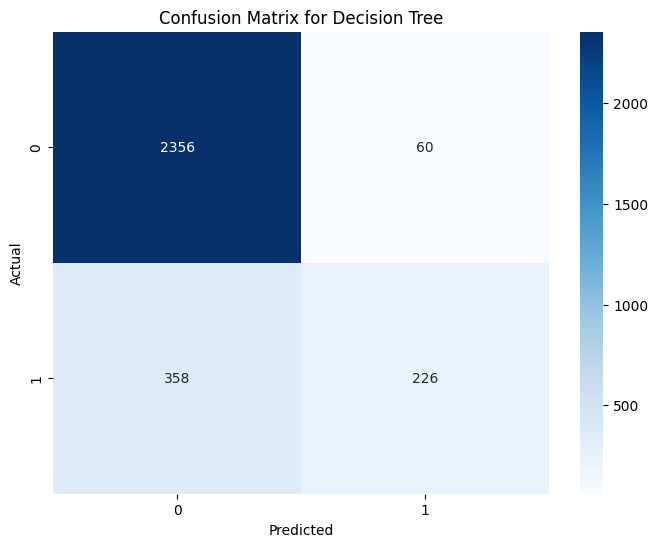

In [53]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

# Distribution Plot

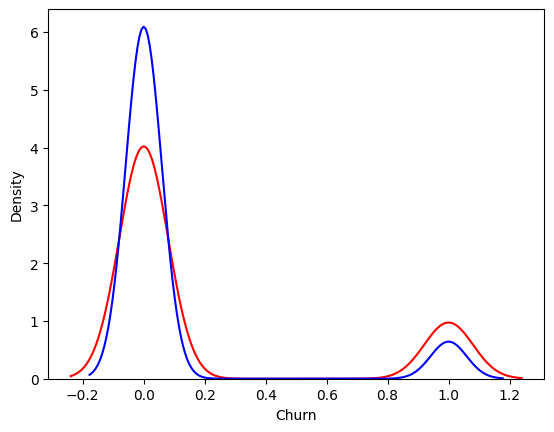

In [58]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
plt.show()


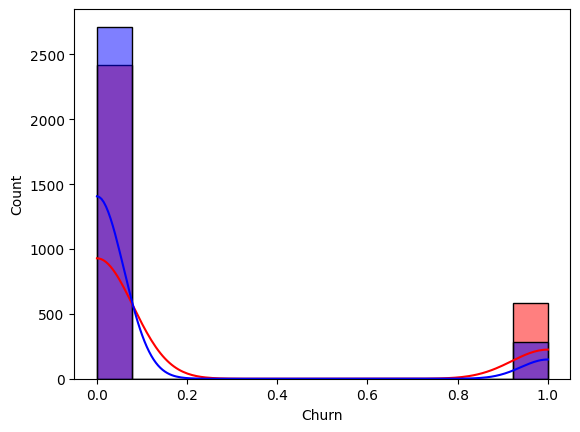

In [59]:
sns.histplot(y_test, color="r", label="Actual Value", kde=True)  # Add kde for density curve
sns.histplot(dtree_pred, color="b", label="Fitted Values", kde=True, alpha=0.5)  # alpha for transparency
plt.show()

The more overlapping of two colors, the more accurate the model is.

## Classification Report

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.79      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [61]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8606666666666667
Mean Absolute Error:  0.13933333333333334
R2 Score:  0.11123333030935334


## Random Forest Classifier
## Confusion Matrix Heatmap

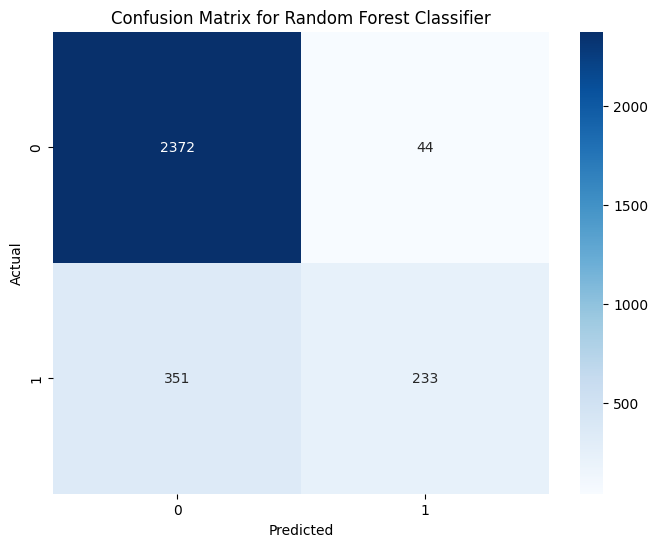

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

## Distribution Plot

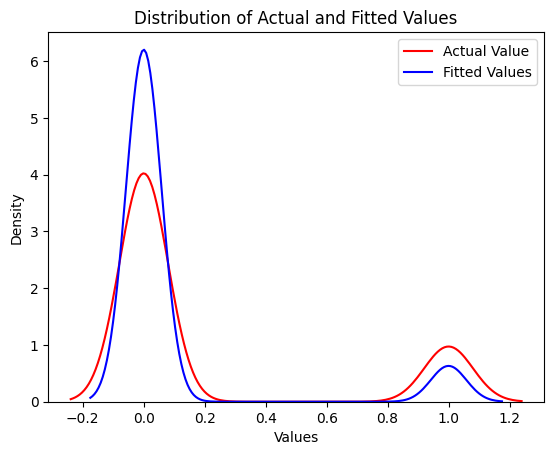

In [65]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the actual values using kdeplot
sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax)

# Plot the predicted values using kdeplot
sns.kdeplot(rfc_pred, color="b", label="Fitted Values", ax=ax)

# Add labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual and Fitted Values")

# Show legend and plot
plt.legend()
plt.show()

# Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.84      0.40      0.54       584

    accuracy                           0.87      3000
   macro avg       0.86      0.69      0.73      3000
weighted avg       0.87      0.87      0.85      3000



In [67]:
print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.8683333333333333
Mean Absolute Error:  0.13166666666666665
R2 Score:  0.16013675950285788


# Conclusion
From the exploratory data analysis, I have concluded that the churn count of the customersdepends upon the following factors:

1. Age
2. Geography
3. Tenure
4. Balance
5. Number of Products
6. Has Credit Card
7. Is Active Member

Coming to the classification models, following models have been used:

1. Decision Tree Classifier
2. Random Forest Classifier

Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score.

But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.